# Load and Prepare Data
Load the frontier data from files into a pandas DataFrame. This step is similar to the existing code, parsing file names to populate 'Dataset', 'Frontier', and 'Size' columns.

In [1]:
import os
import pandas as pd

# Initialize an empty DataFrame to store the data
data = pd.DataFrame(columns=["Dataset", "Frontier", "Size"])

# Directory containing the frontier data files
data_dir = "../frontiers"

# Iterate through files in the directory
for file_name in os.listdir(data_dir):
    if file_name.endswith(".log"):  # Assuming the files are text files
      dataset_name = file_name.replace(".log", "")
      file_path = os.path.join(data_dir, file_name)
      # Parse the file and collect data
      with open(file_path, "r") as file:
        for line in file:
          if not line.startswith("frontier"):
            continue
          parts = line.strip().split()
          frontier_number = int(parts[1])
          size = int(parts[3])
          data = pd.concat([data, pd.DataFrame([{"Dataset": dataset_name, "Frontier": frontier_number, "Size": size}])], ignore_index=True)

# Convert columns to appropriate data types
data["Frontier"] = data["Frontier"].astype(int)
data["Size"] = data["Size"].astype(int)

# Classify Datasets

In [48]:
class_mapping = {
  "asia_osm": "Road networks",
  "europe_osm": "Road networks",
  "GAP-road": "Road networks",
  "GAP-web": "Social networks",
  "hollywood-2009": "Social networks",
  "wikipedia-2007": "Social networks",
  "Geo_1438": "Finite Element Models",
  "Hook_1498": "Finite Element Models",
  "PFlow_742": "Finite Element Models",
  "rgg_n_2_22_s0": "Random Geometric Graphs",
}

# Add the 'Category' column to the DataFrame
data["Type"] = data["Dataset"].map(class_mapping)

legend_order = [
  "Social networks",
  "Finite Element Models",
  "Random Geometric Graphs",
  "Road networks",
]

# Plot Datasets

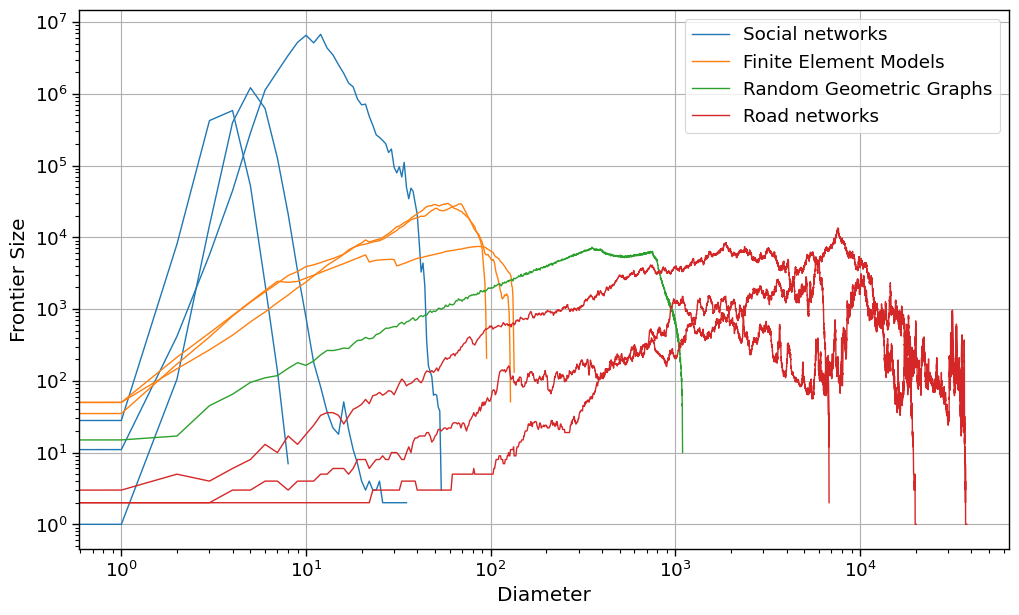

In [ ]:
# small_diameter_data = data[data["Category"] == "large"]

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

with sns.plotting_context("paper", font_scale=1.5):
  # Create a figure and axes object for more control over the plot
  fig, ax = plt.subplots(figsize=(12, 6))

  sns.lineplot(
    data=data,
    x='Frontier',
    y='Size',
    hue='Type',
    linewidth=1,
    ax=ax,
    units="Dataset",
    estimator=None,
    hue_order=legend_order,
  )

  ax.set_yscale("log")
  ax.set_xscale("log")
  # ax.xaxis.set_major_formatter(ScalarFormatter())
  # ax.yaxis.set_major_formatter(ScalarFormatter())
  # ax.ticklabel_format(style='plain', axis='y')
  ax.set_xlabel("Diameter")
  ax.set_ylabel("Frontier Size")
  ax.legend()
  ax.grid()

  plt.savefig('frontiers_plot.png', 
    dpi=300, 
    bbox_inches='tight', 
    facecolor='white', 
    edgecolor='none',
    format='png')

  plt.show()